## Importing required packages

In [4]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib
# !pip install collections
# !pip install gdown

from collections import Counter
from numpy import mean, std
import numpy as np
from pandas import read_csv
import pandas as pd
import gdown

import copy
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
from credit_data_actual_values import substitute
# 

## Downloading the data

In [5]:
# Download from Google Drive
url = 'https://drive.google.com/uc?id=' + '1WC-3iPQJrud1WTer883rYdHMHGqgIVJ9' #(URI ID)
output = './german.data' # Destination directory
gdown.download(url, output, quiet=False) 

Downloading...
From: https://drive.google.com/uc?id=1WC-3iPQJrud1WTer883rYdHMHGqgIVJ9
To: /content/german.data
100%|██████████| 79.8k/79.8k [00:00<00:00, 1.44MB/s]


'./german.data'

In [6]:
#Load the data using pandas read_csv method
df=read_csv(output, sep=" ", header=None)
#Display the first few rows in the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


## Data Visualization

In [6]:
# Displaying data in human readable form with method substitute
# Make replica of the data for converting all the attribute values into human readable form
df_vis = copy.deepcopy(df)
# Call the method substitute from credit_data_actual_values.py to display the real world values
df_vis = substitute(df_vis)

In [7]:
# Display the first few rows of the data
df_vis.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


In [8]:
# Shape of the data
df_vis.shape

(1000, 21)

#Checking for null and missing values in the dataset

In [9]:
df_vis.isnull().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

# No Missing data in the dataset

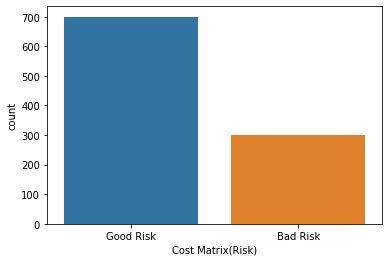

In [10]:
# Plotting the target label
import seaborn as sns
sns.countplot(x='Cost Matrix(Risk)',data=df_vis)
plt.show()

# There is an imbalance in the dataset, as we see we have 70% od the data as good and 30% as bad

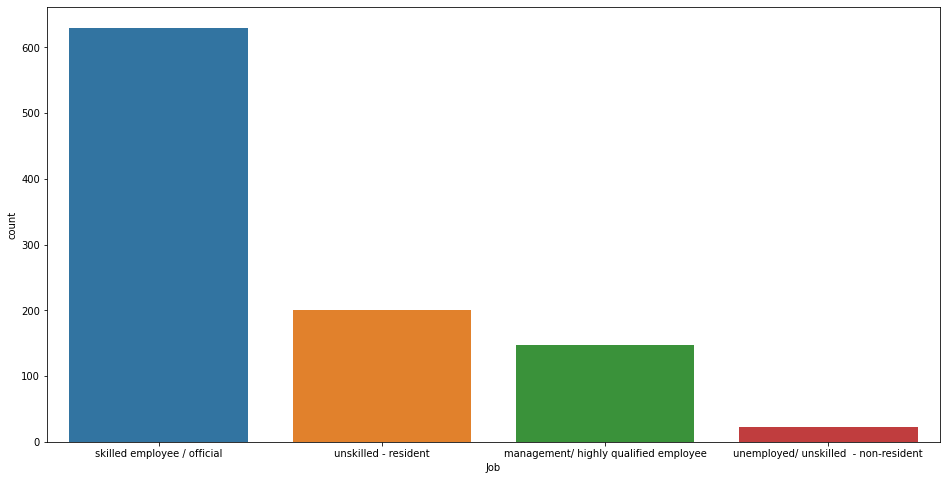

In [11]:
#Plotting the histogram of values from any other attribute of choice
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='Job', data=df_vis)
plt.show()

In [12]:
import seaborn as sns

fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(df_vis.corr(), annot = True, fmt = '.2f')

## Prepare Data

In [7]:
# split the data frame into inputs and outputs
last_ix = len(df.columns) - 1
X, y = df.drop(last_ix, axis=1), df[last_ix]

In [8]:
# Categorical features has to be converted into integer values for the model to process. 
#This is done through one hot encoding.
# select categorical features
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
# one hot encode categorical features only
ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
X = ct.fit_transform(X)
# label encode the target variable to have the classes 0 and 1
y = LabelEncoder().fit_transform(y)
print(X.shape, y.shape, Counter(y))

(1000, 61) (1000,) Counter({0: 700, 1: 300})


In [15]:
!pip install imbalanced-learn
# As we see some imblance in the data target variables , 
# using the SMOTE technique to make it balanced data before modeling

In [16]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X,y)

print(f''' Shape of X before SMOTE: {X.shape}
      Shape of X after SMOTE: {X_sm.shape}''')



 Shape of X before SMOTE: (1000, 61)
      Shape of X after SMOTE: (1400, 61)


In [17]:
y_sm1 = pd.DataFrame(y_sm, columns=['Cost Matrix(Risk)'])
y_sm1.head()

,Cost Matrix(Risk)
0,0
1,1
2,0
3,0
4,1


# After applying SMOTE we see the data is more balanced as below

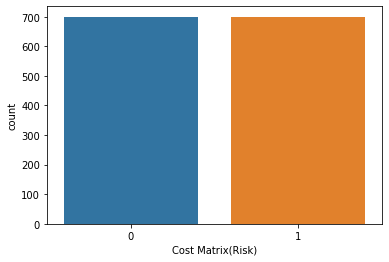

In [18]:
# import seaborn as sns
sns.countplot(x='Cost Matrix(Risk)',data=y_sm1)
plt.show()

In [19]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2)

## Training  the Model with different classifiers

In [20]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=101)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [21]:
# Logistic regression classifier
clf_lg = LogisticRegression(penalty='l2',C=1.0, max_iter=10000)
clf_lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Decision Tree classifier
clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
# SVM classifier
clf_svc = SVC(kernel='poly', degree=3, max_iter=300000)
clf_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=300000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
# Gaussian Naive Bayes classifier
clf_g = GaussianNB()
clf_g.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
# Knn Classifier
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [26]:
# Manhattan distance
clf_knn = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [27]:
# Stochastic Graidient Descent
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(random_state=101)
clf_sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

## Evaluate the Model for Random forest

In [28]:
#Predicting for test data
y_pred = clf_rf.predict(X_test)

In [29]:
#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

In [30]:
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.8535714285714285
Recall: 0.8535714285714285
Precision: 0.8535714285714285
F1-score: 0.8517542840170973


## Visualization of Results

In [31]:
#store the confusion matrix in the variable cm with dim:2x2
cm_rf = confusion_matrix(y_test, y_pred)

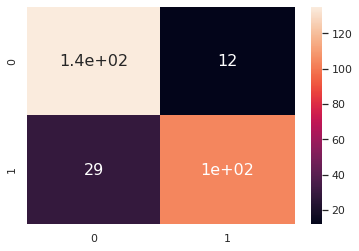

In [32]:
#Convert the values into dataframe for dispalying
df_cm = pd.DataFrame(cm_rf, range(cm_rf.shape[0]), range(cm_rf.shape[1]))
sns.set(font_scale=1) # for label size
#Display the confusion matrix in the form of heatmap
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#Show the plot
plt.show()

In [33]:
# Task 5: Calculate ROC curve and find fpr, tpr, thresholds
from sklearn.metrics import roc_curve, auc
# Get ROC curve FPR and TPR from true labels vs score values
fpr, tpr, _= roc_curve(y_test, y_pred)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)

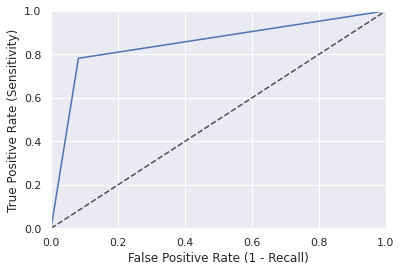



Area Under Curve: 0.85




In [34]:
# Display the values into a plot
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

# Evaluating the model for Logisitic Resgression Classifier

In [35]:
#Predicting for test data
y_pred = clf_lg.predict(X_test)

In [36]:
#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

In [37]:
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.7428571428571429
Recall: 0.7428571428571429
Precision: 0.7428571428571429
F1-score: 0.7428571428571429


In [38]:
#store the confusion matrix in the variable cm with dim:2x2
cm_lg = confusion_matrix(y_test, y_pred)

In [39]:
# Calculating ROC curve and find fpr, tpr, thresholds for Logistic Regresssion
from sklearn.metrics import roc_curve, auc
# Get ROC curve FPR and TPR from true labels vs score values
fpr, tpr, _= roc_curve(y_test, y_pred)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)

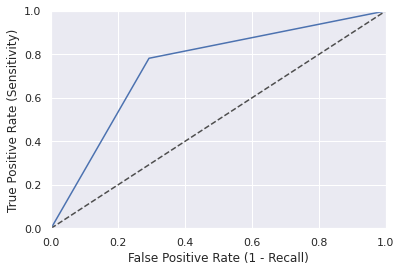



Area Under Curve: 0.74




In [40]:
# Display the values into a plot
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

# Evaluating the model for Decision tree

In [41]:
#Predicting for test data
y_pred = clf_dt.predict(X_test)

In [42]:
#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

In [43]:
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.7535714285714286
Recall: 0.7535714285714286
Precision: 0.7535714285714286
F1-score: 0.7533165643075116


In [44]:
#store the confusion matrix in the variable cm with dim:2x2
cm_lg = confusion_matrix(y_test, y_pred)

In [45]:
# Calculating ROC curve and find fpr, tpr, thresholds for Logistic Regresssion
from sklearn.metrics import roc_curve, auc
# Get ROC curve FPR and TPR from true labels vs score values
fpr, tpr, _= roc_curve(y_test, y_pred)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)

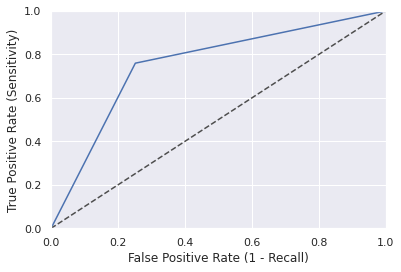



Area Under Curve: 0.75




In [46]:
# Display the values into a plot
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

# Summary
* After applying the 3 alogrithms Random Forest, Logistic Regression and Decisiion Tree
* Random Forest is having the highest accuracy 

# Using autoMl h20 package to understadn differnt aspects of the data
## Here we can visualize the data and explain the features dependencies on the target variable

In [47]:
!pip install h2o

     |████████████████████████████████| 164.8MB 92kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.4-py2.py3-none-any.whl size=164871668 sha256=17dbf432d6f8faea04cddbb0d15b44a6b5db52c4c60cb7d7479ccf6725efe465
  Stored in directory: /root/.cache/pip/wheels/67/76/54/89d7711536d5bb0d010bf35a34deca3eddc757efba78dbc74f
Successfully built h2o


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps6bvy4jo
  JVM stdout: /tmp/tmps6bvy4jo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps6bvy4jo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_g93ncx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.174 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_20210718_010242,0.782196,0.136161,0.142778,0.323676,0.178178,0.0317474,634,0.026896,GLM
XGBoost_grid__1_AutoML_20210718_010242_model_5,0.779299,0.129007,0.161573,0.340239,0.175419,0.0307717,287,0.018797,XGBoost
DeepLearning_grid__1_AutoML_20210718_010242_model_1,0.778019,0.169696,0.204383,0.347675,0.17675,0.0312405,264,0.026475,DeepLearning
StackedEnsemble_BestOfFamily_AutoML_20210718_010242,0.771138,0.130858,0.151075,0.327201,0.176463,0.031139,887,0.041121,StackedEnsemble
XRT_1_AutoML_20210718_010242,0.770583,0.207927,0.1826,0.33372,0.177451,0.031489,194,0.01608,DRF
GBM_grid__1_AutoML_20210718_010242_model_1,0.769013,0.135983,0.136504,0.349631,0.180577,0.0326079,297,0.022183,GBM
XGBoost_grid__1_AutoML_20210718_010242_model_2,0.768965,0.137332,0.142013,0.366845,0.181268,0.0328581,287,0.01512,XGBoost
GBM_grid__1_AutoML_20210718_010242_model_4,0.765247,0.128395,0.161826,0.334372,0.174791,0.0305519,117,0.016214,GBM
XGBoost_grid__1_AutoML_20210718_010242_model_7,0.764088,0.143061,0.130019,0.350282,0.182144,0.0331764,271,0.015587,XGBoost
GBM_grid__1_AutoML_20210718_010242_model_3,0.760877,0.130917,0.136945,0.370757,0.176087,0.0310065,220,0.020245,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_20210718_010242


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06188316601464403: 


,,A201,A202,Error,Rate
0,A201,719.0,48.0,0.0626,(48.0/767.0)
1,A202,13.0,14.0,0.4815,(13.0/27.0)
2,Total,732.0,62.0,0.0768,(61.0/794.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

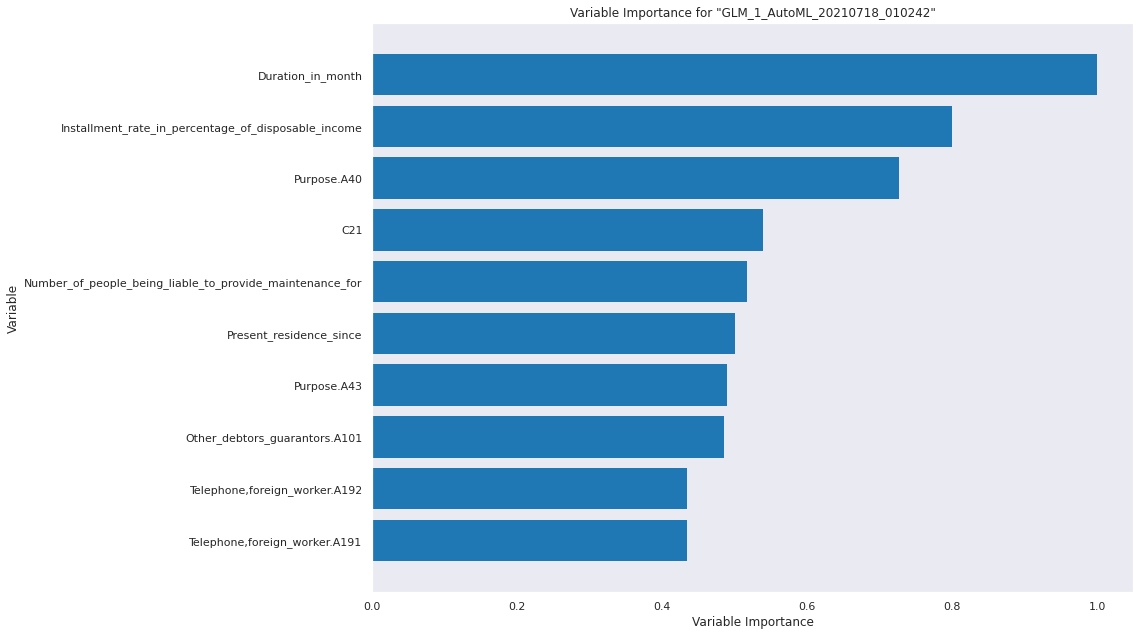

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

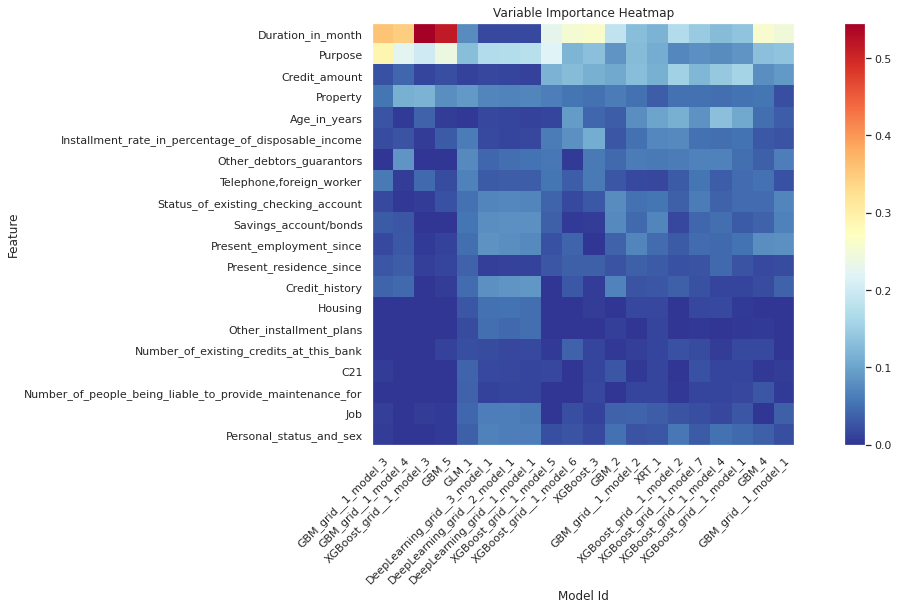

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

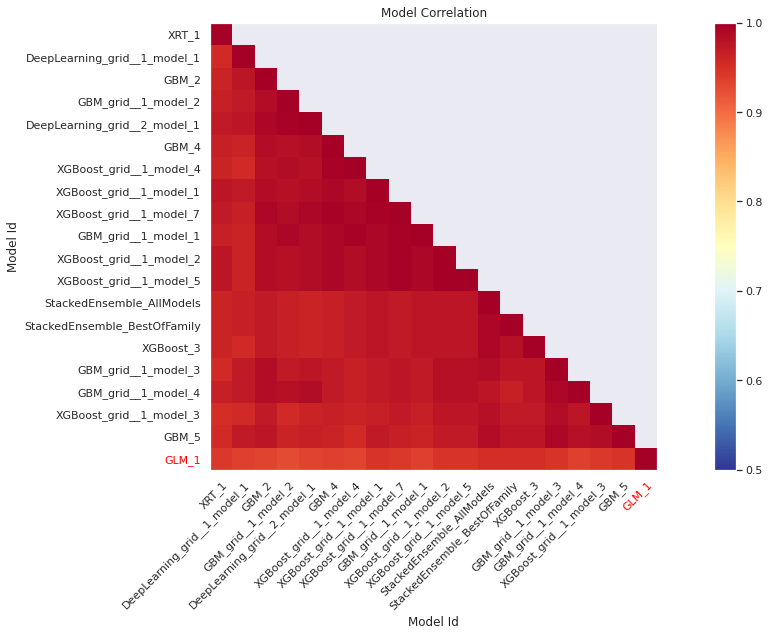

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

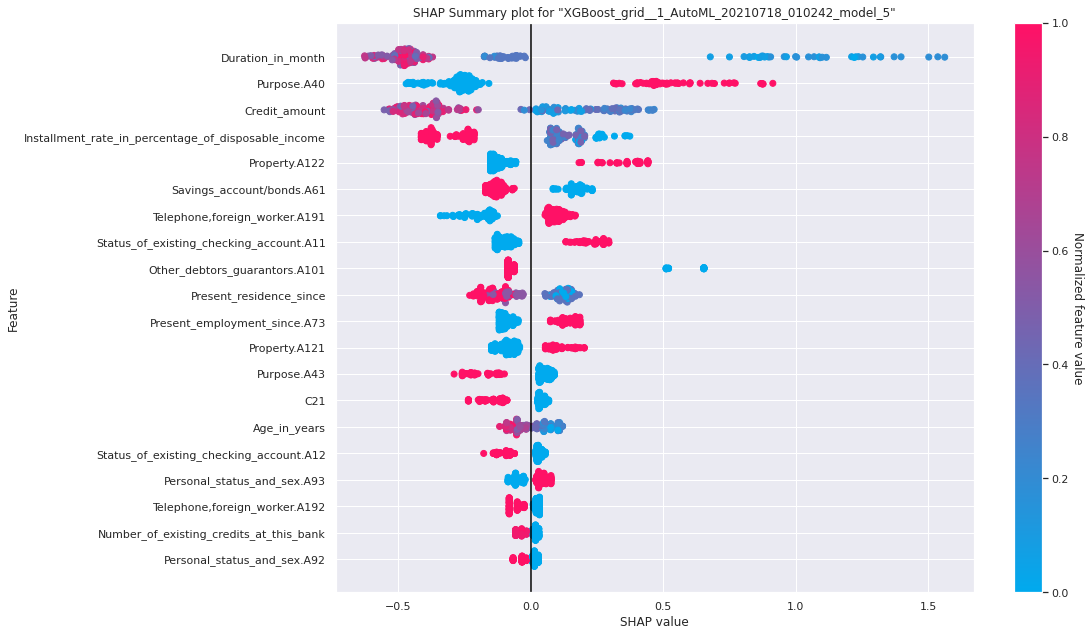

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

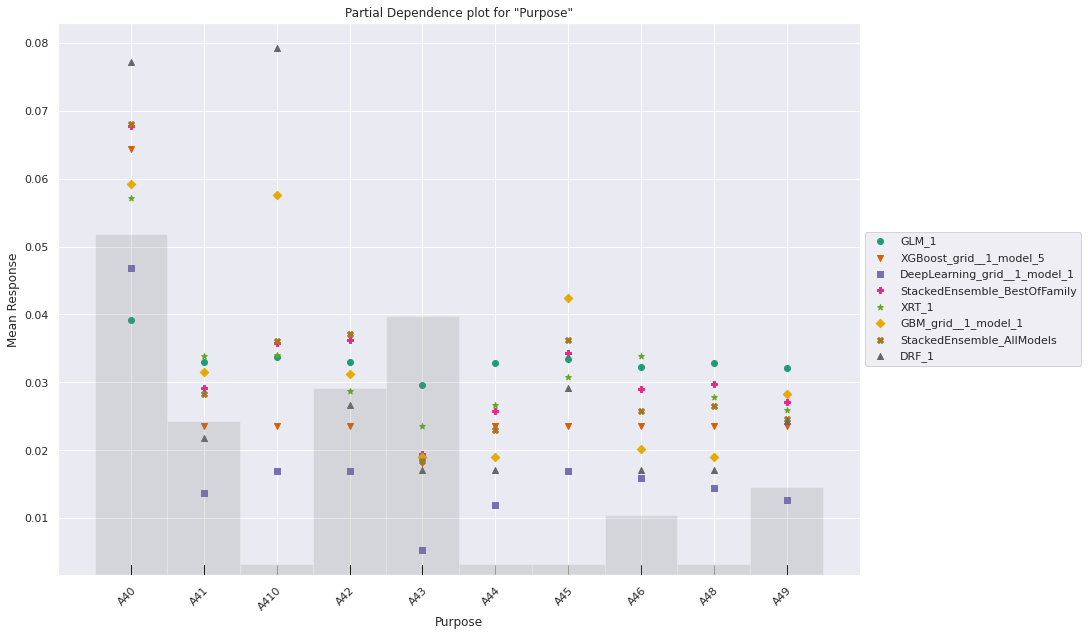

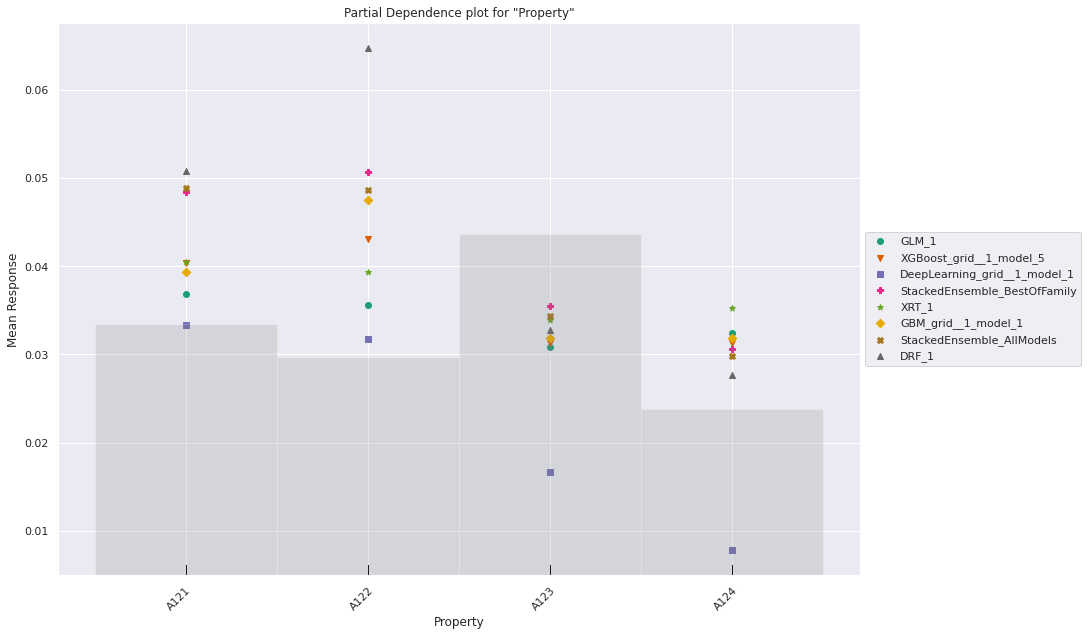

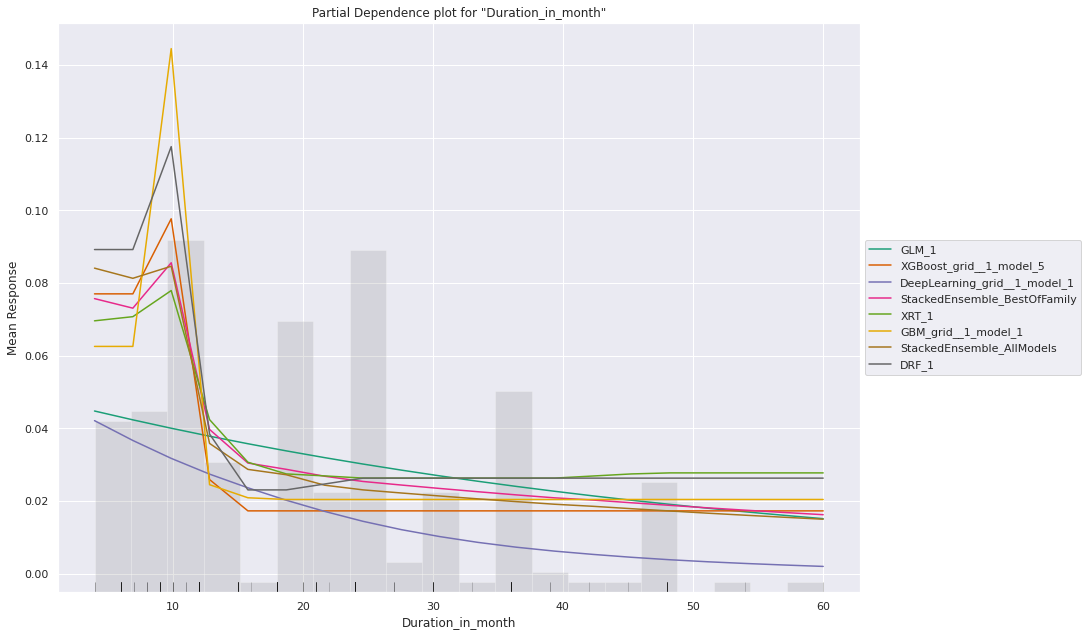

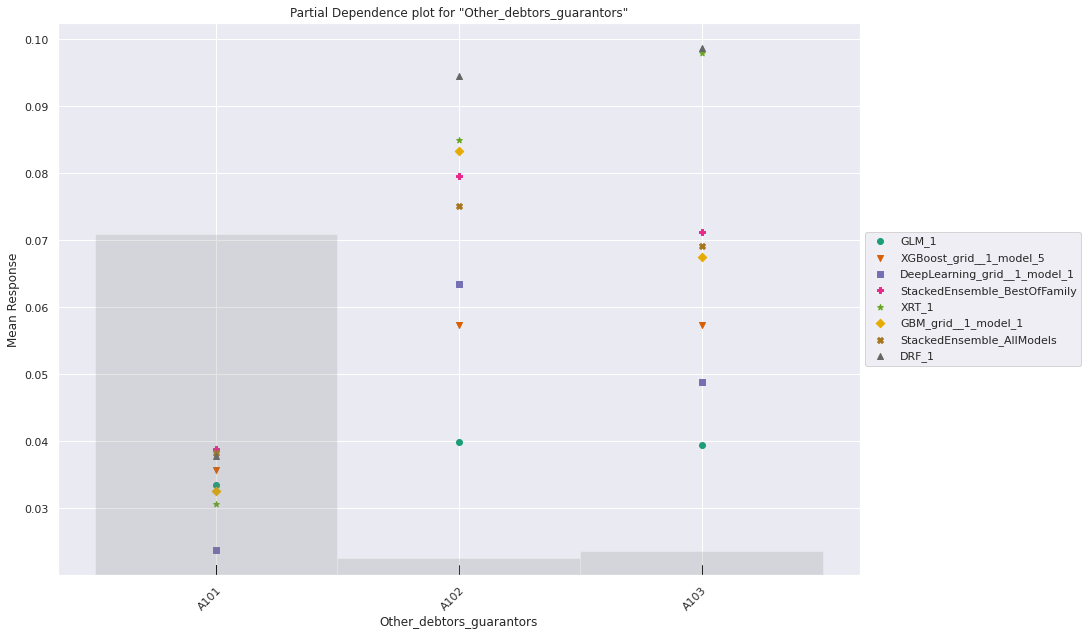

H2OServerError: ignored

<Figure size 1152x648 with 0 Axes>

In [48]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import wine quality dataset
f = "output.csv"
df = h2o.import_file(f)

# Reponse column
y = "risk"

# Split into train & test
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

# Explain leader model & compare with all AutoML models
exa = aml.explain(test)

# # Explain a single H2O model (e.g. leader model from AutoML)
# exm = aml.leader.explain(test)


# The important feautures to consider while modeling are Duration in Month, Purpose, property and credit amount